In [193]:
import math
def getM(Mp, Mm):

    if (Mp == 1):
        return 0.011
    elif (Mm == 1):
        return -0.011
    else:
        return 0

h = 0.02
t, wx, wy, wz, R0, R1, R2, R3, P0, P1, P2, P3, Q0, Q1, Q2, Q3, u1, u2, u3 = (0 for _ in range(19))

R0=math.cos(3.14/4)
R3=math.sin(3.14/4)
wz=0

wz_list = [wz]
t_list = [0]
R3_list = [0]

while t<100:
    #кватернион рассогласования за h
    P1 = wx*h*0.5
    P2 = wy*h*0.5
    P3 = wz*h*0.5
    
    SP = P1*P1 + P2*P2 + P3*P3
    SR = R0*R0 + R1*R1 + R2*R2 + R3*R3
    
    P0 = (3 - SP - SR)*0.5
    
    #кватернион в t+h
    Q0=R0*P0 - R1*P1 - R2*P2 - R3*P3
    Q1=R0*P1 + R1*P0 + R2*P3 - R3*P2
    Q2=R0*P2 + R2*P0 + R3*P1 - R1*P3
    Q3=R0*P3 + R3*P0 + R1*P2 - R2*P1
    
    
    u1 = -(2*(Q0*Q1) + 7*wx)
    u2 = -(2*(Q0*Q2) + 7*wy)
    u3 = -(2*(Q0*Q3) + 7*wz)
    
    
    R0=Q0
    R1=Q1
    R2=Q2
    R3=Q3

    if (u1>0):
        Mmx = 0
        Mpx = 1
    elif (u1<0):
        Mmx = 1
        Mpx = 0
    else:
        Mmx = 0
        Mpx = 0

    if (u2>0):
        Mmy = 0
        Mpy = 1
    elif (u2<0):
        Mmy = 1
        Mpy = 0
    else:
        Mmy = 0
        Mpy = 0

    if (u3>0):
        Mmz = 0
        Mpz = 1
    elif (u3<0):
        Mmz = 1
        Mpz = 0
    else:
        Mmz = 0
        Mpz = 0
        
    if ((wz)>(0.1)):
        Mpz = 0  
    if (((wz)<(-0.1))):
        Mmz = 0
        
    
    
#obs        
    Mx=getM(Mpx, Mmx)
    My=getM(Mpy, Mmy)
    Mz=getM(Mpz, Mmz)

    wx = Mx * h + wx
    wy = My * h + wy
    wz = Mz * h + wz
    
    
    t=t+h
#graphs   
    wz_list.append(wz)
    R3_list.append(2*Q0*Q3)
    t=t+h
    t_list.append(t)

In [194]:
import matplotlib.pyplot as pp
%matplotlib inline

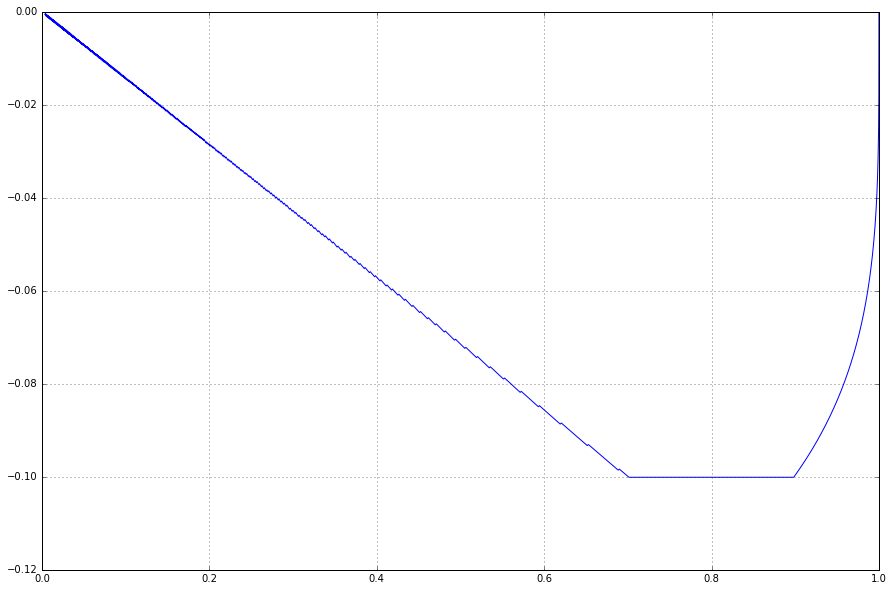

In [195]:
fig, ax = pp.subplots(figsize=(15,10))

ax.plot(R3_list[1:], wz_list[1:])
ax.grid(True)

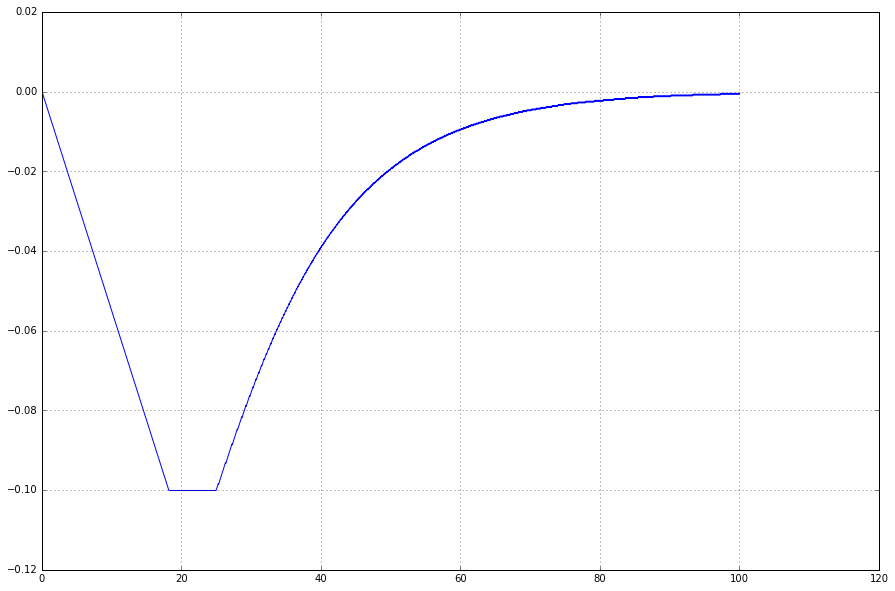

In [197]:
fig, ax = pp.subplots(figsize=(15,10))

ax.plot(t_list, wz_list)
ax.grid(True)